# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer 

### Student Name: SANDRA RUIZ

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

URL: https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html

In [2]:
### Pre Set Up
##### Create and activate a Python virtual environment. 
###### Before starting the project, try all these imports FIRST
###### Address any errors you get running this code cell 
###### by installing the necessary packages into your active Python environment.
##### Try to resolve issues using your materials and the web.
###### If that doesn't work, ask for help in the discussion forums.
###### You can't complete the exercises until you import these - start early! 
###### We also import pickle and Counter (included in the Python Standard Library).


%pip install matplotlib
!pip install spacy
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


# List installed packages
!pip list

print('All prereqs installed.')

Note: you may need to restart the kernel to use updated packages.
Package            Version
------------------ -----------
annotated-types    0.7.0
asttokens          3.0.0
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.8.30
charset-normalizer 3.4.0
click              8.1.7
cloudpathlib       0.20.0
colorama           0.4.6
comm               0.2.2
confection         0.1.5
contourpy          1.3.1
cycler             0.12.1
cymem              2.0.10
debugpy            1.8.9
decorator          5.1.1
executing          2.1.0
fonttools          4.55.0
idna               3.10
ipykernel          6.29.5
ipython            8.30.0
jedi               0.19.2
Jinja2             3.1.4
jupyter_client     8.6.3
jupyter_core       5.7.2
kiwisolver         1.4.7
langcodes          3.5.0
language_data      1.3.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.9.3
matplotlib-inline  0.1.7
mdurl         

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [5]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the page to scrape
url = "https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html"

# Fetch the page content (only once)
response = requests.get(url, verify=False)
if response.status_code == 200:
    print("Page fetched successfully!")
    soup = BeautifulSoup(response.text, "html.parser")

    # Extracting table rows (adjust selectors as needed)
    table = soup.find("table")
    rows = table.find_all("tr")[1:]  # Skip the header row

    offenders = []
    for row in rows:
        columns = row.find_all("td")
        offender_data = [col.text.strip() for col in columns]
        offenders.append(offender_data)

    # Save to pickle file
    with open("executed_offenders.pkl", "wb") as f:
        pickle.dump(offenders, f)

    print(f"Saved {len(offenders)} records to 'executed_offenders.pkl'.")
else:
    print(f"Failed to fetch page, status code: {response.status_code}")




c:\Users\19564\Documents\D7.Ruiz\.env\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tdcj.texas.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Page fetched successfully!
Saved 591 records to 'executed_offenders.pkl'.


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [ ]:
import pickle
import requests
from bs4 import BeautifulSoup
import spacy
from textblob import TextBlob


# Fetch the HTML content from the URL
url = "https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html"
response = requests.get(url, verify=False)  # Add verify=False to disable SSL verification


# Check if the request was successful
if response.status_code == 200:
    html_content = response.text
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
    html_content = ""

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Get the text content of the article 
text_content = soup.get_text()
clean_text = " ".join(text_content.split())  

# Save the clean text to a .txt file
with open("article_text.txt", "w") as text_file:
    text_file.write(clean_text)

# Print the first 500 characters of the article
print("First 500 characters of the article:")
print(clean_text[:500])

# Perform sentiment analysis using TextBlob
blob = TextBlob(clean_text)
polarity_score = blob.sentiment.polarity

# Load the pickle file containing executed offenders
pickle_path = r'C:\Users\19564\Documents\D7.Ruiz\wmnlp-materials.article.summarizer\executed_offenders.pkl'

with open(pickle_path, "rb") as file:
    executed_offenders_data = pickle.load(file)

# Print the first 5 offenders from the pickle data (assuming it's a list or dictionary)
print("\nFirst 5 executed offenders:")
print(executed_offenders_data[:5] if isinstance(executed_offenders_data, list) else executed_offenders_data)

# Count the number of sentences in the article using spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(clean_text)
num_sentences = len(list(doc.sents))

# Print the sentiment analysis and sentence count
print("\nPolarity Score:", polarity_score)
if polarity_score > 0:
    print("The article has a positive sentiment.")
elif polarity_score < 0:
    print("The article has a negative sentiment.")
else:
    print("The article has a neutral sentiment.")

print(f"Number of sentences in the article: {num_sentences}")

# Save the sentiment analysis results to the .txt file
with open("article_analysis.txt", "w") as analysis_file:
    analysis_file.write(f"Polarity Score: {polarity_score}\n")
    if polarity_score > 0:
        analysis_file.write("The article has a positive sentiment.\n")
    elif polarity_score < 0:
        analysis_file.write("The article has a negative sentiment.\n")
    else:
        analysis_file.write("The article has a neutral sentiment.\n")
    analysis_file.write(f"Number of sentences in the article: {num_sentences}\n")



 

c:\Users\19564\Documents\D7.Ruiz\.env\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tdcj.texas.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


First 500 characters of the article:
Death Row Information skip to main content Micro Focus Outage Micro Focus Outage Home | Intranet | Contact Link to Texas Department of Criminal Justice homepage search_input Home TDCJ Home How Do I…? News Online Services Inside TDCJ Information for Victims Career Opportunities Inmate Information Find a Facility Death Row Information Executed Inmates Executed Inmates Execution Link Link Last Name First Name TDCJNumber Age Date Race County 591 Inmate Information Last Statement White Garcia 999205 

First 5 executed offenders:
[['591', 'Inmate Information', 'Last Statement', 'White', 'Garcia', '999205', '61', '10/1/2024', 'Black', 'Harris'], ['590', 'Inmate Information', 'Last Statement', 'Mullis', 'Travis', '999563', '38', '9/24/2024', 'White', 'Galveston'], ['589', 'Inmate Information', 'Last Statement', 'Burton', 'Arthur', '999283', '44', '8/7/2024', 'Black', 'Harris'], ['588', 'Inmate Information', 'Last Statement', 'Gonzales', 'Ramiro', '999513', 

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [26]:
import spacy
import requests
from bs4 import BeautifulSoup
from collections import Counter

# Load the pre-trained spaCy model (English model)
nlp = spacy.load("en_core_web_sm")

# URL of the article
url = "https://www.tdcj.texas.gov/death_row/dr_executed_offenders.html"
response = requests.get(url, verify=False)  # Add verify=False to disable SSL verification


# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Extract all text content from the HTML (e.g., from paragraphs)
article_text = soup.get_text()

# Process the article text with spaCy
doc = nlp(article_text)

# Extract tokens and convert them to lowercase (filter out stop words and punctuation)
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

# Calculate frequencies of the tokens
token_frequencies = Counter(tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_frequencies.most_common(5)

# Print the most frequent tokens and their frequencies
print("The 5 most frequent tokens are:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")





c:\Users\19564\Documents\D7.Ruiz\.env\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.tdcj.texas.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


The 5 most frequent tokens are:
Token: 
, Frequency: 5301
Token: information, Frequency: 595
Token: inmate, Frequency: 592
Token: statement, Frequency: 591
Token: 

, Frequency: 394


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [ ]:
import spacy
import pickle
from collections import Counter

# Load the pre-trained spaCy model (English model)
nlp = spacy.load("en_core_web_sm")

# Load the article text from the pickle file
with open(r"C:\Users\19564\Documents\D7.Ruiz\wmnlp-materials.article.summarizer\executed_offenders.pkl", 'rb') as file:
    article_text = pickle.load(file)

# Flatten any nested lists and ensure all items are strings
if isinstance(article_text, list):
    # If any item in the list is a list, flatten it
    article_text = ' '.join([str(item) for sublist in article_text for item in (sublist if isinstance(sublist, list) else [sublist])])

# Process the article text with spaCy
doc = nlp(article_text)

# Extract the lemmas and convert them to lowercase 
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

# Calculate frequencies of the lemmas
lemma_frequencies = Counter(lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_frequencies.most_common(5)

# Print the most frequent lemmas and their frequencies
print("The 5 most frequent lemmas are:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}") 


The 5 most frequent lemmas are:
Lemma: inmate, Frequency: 591
Lemma: information, Frequency: 591
Lemma: statement, Frequency: 591
Lemma: white, Frequency: 268
Lemma: black, Frequency: 213


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

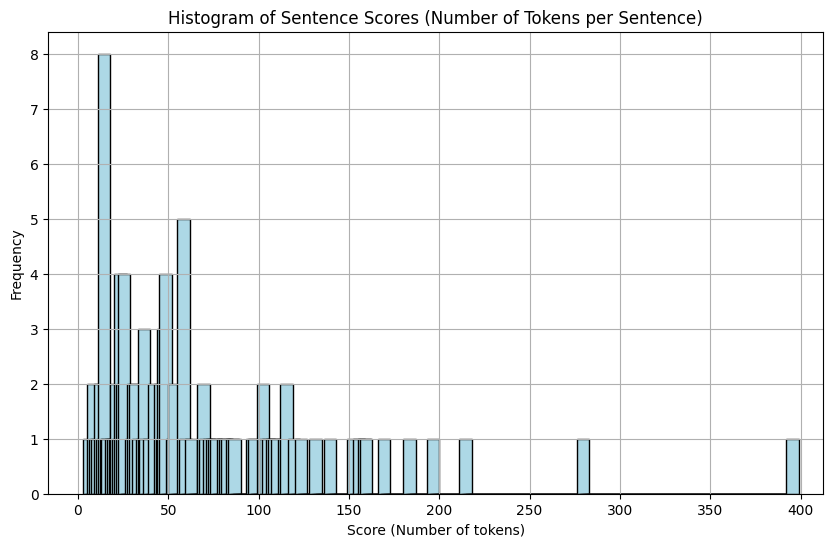

In [37]:
import spacy
import pickle
import matplotlib.pyplot as plt
from collections import Counter

# Load the spaCy model 
nlp = spacy.load("en_core_web_sm")

# Load the article text from a pickle file
with open(r"C:\Users\19564\Documents\D7.Ruiz\wmnlp-materials.article.summarizer\executed_offenders.pkl", 'rb') as file:
    article_text = pickle.load(file)

# Flatten any nested lists and ensure all items are strings to analyze
if isinstance(article_text, list):
    article_text = ' '.join([str(item) for sublist in article_text for item in (sublist if isinstance(sublist, list) else [sublist])])

# Process the article text with spaCy
doc = nlp(article_text)

# List to store the scores of each sentence
sentence_scores = []

# Calculate the score for each sentence (score is the number of tokens excluding stop words and punctuation)
for sent in doc.sents:
    # Count tokens in the sentence that are neither stop words nor punctuation
    score = sum(1 for token in sent if not token.is_stop and not token.is_punct)
    sentence_scores.append(score)

# Plot the histogram of sentence scores
plt.figure(figsize=(10,6))
plt.hist(sentence_scores, bins=range(min(sentence_scores), max(sentence_scores) + 1, 1), edgecolor='black', width=7, color='lightblue')
plt.gcf().set_facecolor('white')

# Add titles and labels
plt.title("Histogram of Sentence Scores (Number of Tokens per Sentence)")
plt.xlabel("Score (Number of tokens)")
plt.ylabel("Frequency")

# Display grid and show the plot
plt.grid(True)
plt.show()


#### Most common range of scores is between 5 and 50 tokens.






6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?